In [1]:
from plotting_routines import generate_filename_fRG, plot_self_energy, plot_spin_susceptibility
import numpy as np
import matplotlib.pyplot as plt
import h5py


path_fRG = "C:/Users/aguir/Documents/Data_Thesis_Local/"
path_NRG = path_fRG

In [2]:
name1 = generate_filename_fRG(path_fRG, 1,1)
name2 = generate_filename_fRG(path_fRG, 1,1, sf=True)
name3 = generate_filename_fRG(path_fRG, 2,1)
name4 = generate_filename_fRG(path_fRG, 2,2, Gamma=0.5)

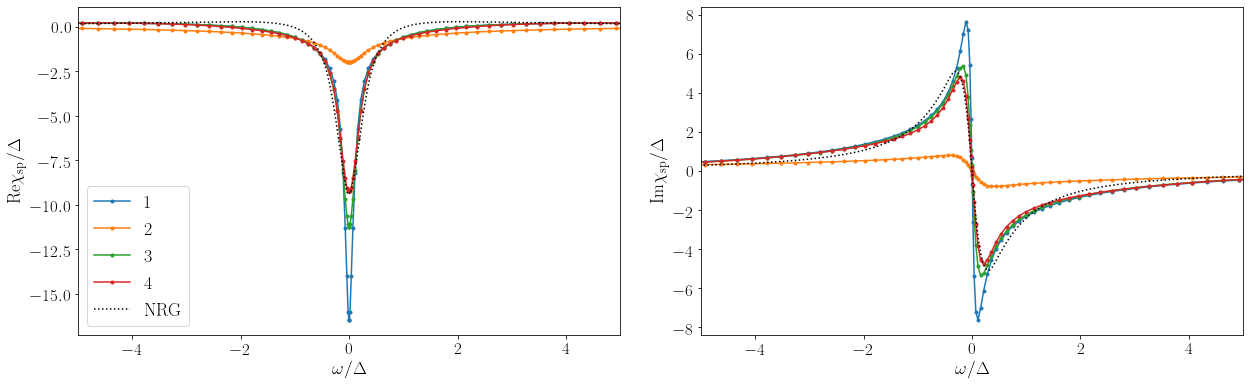

In [9]:
U_NRG = 2
filenames = [name1, name2, name3, name4]
labels = ["1", "2", "3", "4"]

typ = "self"

iK = 1
fig, ax = plot_spin_susceptibility(U_NRG, filenames, labels, path_NRG)

Delta = 0.5


plt.show()
fig.savefig("__" + typ + str(U_NRG/Delta)+".pdf")